### Association of Tennis Professional EDA
#### Reference: https://www.kaggle.com/datasets/sijovm/atpdata/data

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import warnings
from datetime import timedelta
import seaborn as sns

sns.set_palette("bright")
warnings.filterwarnings('ignore')

#Read in the data
matches = pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/ATP_Analysis/main/main/data/atp_matches_till_2022.csv")
players = pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/ATP_Analysis/main/main/data/atp_players_till_2022.csv")
ranking = pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/ATP_Analysis/main/main/data/atp_rankings_till_2022.csv")

print(matches.shape)
print(players.shape)
print(ranking.shape)

(188161, 49)
(58687, 8)
(3113261, 4)


In [2]:
matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
players.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554


In [4]:
ranking.head()

,ranking_date,rank,player,points
0,20100104,1,103819,10550.0
1,20100104,2,104745,9205.0
2,20100104,3,104925,8310.0
3,20100104,4,104918,7030.0
4,20100104,5,105223,6785.0


In [5]:
#Rearrange matches data to have wins and losses partition
win_matches = matches.iloc[:,np.r_[0:15,23:36,45:47]]
lose_matches = matches.iloc[:,np.r_[0:7,15:27,36:45,47:49]]

print(win_matches.shape)
print(lose_matches.shape)

(188161, 30)
(188161, 30)


In [6]:
win_matches = win_matches.rename(
    columns={
        'winner_id':'player_id',
        'winner_seed':'player_seed',
        'winner_entry':'player_entry',
        'winner_name':'player_name',
        'winner_hand':'player_hand',
        'winner_ht':'player_ht',
        'winner_ioc':'player_ioc',
        'winner_age':'player_age',
        'w_ace':'num_aces',
        'w_df':'num_dfs',
        'w_svpt':'num_svpts',
        'w_1stIn':'serve1_in_perc',
        'w_1stWon':'serve1_win_perc',
        'w_2ndWon':'serve2_win_perc',
        'w_SvGms':'num_games_served',
        'w_bpSaved':'num_brkpts_saved',
        'w_bpFaced':'num_brkpts_faced',
        'winner_rank':'rank',
        'winner_rank_points':'rank_points'
    }
)

win_matches['outcome'] = 1

In [7]:
lose_matches = lose_matches.rename(
    columns={
        'loser_id':'player_id',
        'loser_seed':'player_seed',
        'loser_entry':'player_entry',
        'loser_name':'player_name',
        'loser_hand':'player_hand',
        'loser_ht':'player_ht',
        'loser_ioc':'player_ioc',
        'loser_age':'player_age',
        'l_ace':'num_aces',
        'l_df':'num_dfs',
        'l_svpt':'num_svpts',
        'l_1stIn':'serve1_in_perc',
        'l_1stWon':'serve1_win_perc',
        'l_2ndWon':'serve2_win_perc',
        'l_SvGms':'num_games_served',
        'l_bpSaved':'num_brkpts_saved',
        'l_bpFaced':'num_brkpts_faced',
        'loser_rank':'rank',
        'loser_rank_points':'rank_points'
    }
)

lose_matches['outcome'] = 0

In [8]:
#Stack wins and losses data
matches = pd.concat([win_matches, lose_matches], ignore_index=True, axis=0)
matches.shape

(376322, 31)

In [9]:
matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,player_id,player_seed,player_entry,...,num_svpts,serve1_in_perc,serve1_win_perc,serve2_win_perc,num_games_served,num_brkpts_saved,num_brkpts_faced,rank,rank_points,outcome
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


#### Which players had most weeks ranked as #1?

In [10]:
ranking['year'] = ranking['ranking_date'].astype(str).str[:4]
ranking['ranking_date'] = pd.to_datetime(ranking['ranking_date'].astype(str), format='%Y%m%d')
ranking = ranking.rename(columns={'player':'player_id'})
ranking1 = ranking[ranking['rank']==1]
ranking1.head()

,ranking_date,rank,player_id,points,year
0,2010-01-04,1,103819,10550.0,2010
1812,2010-01-11,1,103819,10550.0,2010
3626,2010-01-18,1,103819,10550.0,2010
5439,2010-01-25,1,103819,10550.0,2010
7252,2010-02-01,1,103819,11350.0,2010


In [11]:
weeks_at_1 = pd.DataFrame(ranking1.groupby('player_id')['rank'].sum()).reset_index()
weeks_at_1 = weeks_at_1.rename(columns={'rank': 'count'})
weeks_at_1 = weeks_at_1.sort_values(by = 'count', ascending=False)
weeks_at_1.head(5)

,player_id,count
25,104925,332
21,103819,307
12,101948,285
5,100656,228
23,104745,193


In [12]:
plyrs = players[['player_id','name_first','name_last','hand','ioc','dob','height']]

In [13]:
weeks_at_1_with_names = pd.merge(weeks_at_1, plyrs, on='player_id', how='inner')
weeks_at_1_with_names.head(10)

,player_id,count,name_first,name_last,hand,ioc,dob,height
0,104925,332,Novak,Djokovic,R,SRB,19870522.0,188.0
1,103819,307,Roger,Federer,R,SUI,19810808.0,185.0
2,101948,285,Pete,Sampras,R,USA,19710812.0,185.0
3,100656,228,Ivan,Lendl,R,USA,19600307.0,188.0
4,104745,193,Rafael,Nadal,L,ESP,19860603.0,185.0
5,100581,136,John,McEnroe,L,USA,19590216.0,180.0
6,100284,104,Jimmy,Connors,L,USA,19520902.0,178.0
7,101736,100,Andre,Agassi,R,USA,19700429.0,180.0
8,100437,94,Bjorn,Borg,R,SWE,19560606.0,180.0
9,103720,80,Lleyton,Hewitt,R,AUS,19810224.0,180.0


#### Longest tenures ranked as #1 (Right vs. Left Handed)

In [14]:
right = weeks_at_1_with_names[weeks_at_1_with_names['hand']=="R"]
left = weeks_at_1_with_names[weeks_at_1_with_names['hand']=="L"]

In [15]:
right.head(5)

,player_id,count,name_first,name_last,hand,ioc,dob,height
0,104925,332,Novak,Djokovic,R,SRB,19870522.0,188.0
1,103819,307,Roger,Federer,R,SUI,19810808.0,185.0
2,101948,285,Pete,Sampras,R,USA,19710812.0,185.0
3,100656,228,Ivan,Lendl,R,USA,19600307.0,188.0
7,101736,100,Andre,Agassi,R,USA,19700429.0,180.0


In [16]:
left.head(5)

,player_id,count,name_first,name_last,hand,ioc,dob,height
4,104745,193,Rafael,Nadal,L,ESP,19860603.0,185.0
5,100581,136,John,McEnroe,L,USA,19590216.0,180.0
6,100284,104,Jimmy,Connors,L,USA,19520902.0,178.0
23,102701,6,Marcelo,Rios,L,CHI,19751226.0,175.0
24,101404,6,Thomas,Muster,L,AUT,19671002.0,180.0


### Longest tenures ranked as #1 by country

In [17]:
usa = weeks_at_1_with_names[weeks_at_1_with_names['ioc']=="USA"]
spain = weeks_at_1_with_names[weeks_at_1_with_names['ioc']=="ESP"]

usa.head(5)

,player_id,count,name_first,name_last,hand,ioc,dob,height
2,101948,285,Pete,Sampras,R,USA,19710812.0,185.0
3,100656,228,Ivan,Lendl,R,USA,19600307.0,188.0
5,100581,136,John,McEnroe,L,USA,19590216.0,180.0
6,100284,104,Jimmy,Connors,L,USA,19520902.0,178.0
7,101736,100,Andre,Agassi,R,USA,19700429.0,180.0


In [18]:
spain.head(5)

,player_id,count,name_first,name_last,hand,ioc,dob,height
4,104745,193,Rafael,Nadal,L,ESP,19860603.0,185.0
15,207989,16,Carlos,Alcaraz,R,ESP,20030505.0,185.0
21,103507,8,Juan Carlos,Ferrero,R,ESP,19800212.0,183.0
25,102845,2,Carlos,Moya,R,ESP,19760827.0,190.0


### Which country had the most players ranked at #1?

In [19]:
country_counts = weeks_at_1_with_names[['ioc','player_id']]
country_counts = pd.DataFrame(weeks_at_1_with_names.groupby('ioc')['player_id'].count()).reset_index()

country_counts = country_counts.rename(columns={
    'ioc': 'country',
    'player_id':'count'
})
country_counts = country_counts.sort_values(by = 'count', ascending=False)
country_counts.head()

,country,count
12,USA,7
4,ESP,4
0,AUS,3
8,RUS,3
11,SWE,3


### What is the average age of players ranked 1-5?

In [20]:
age_df = pd.merge(ranking, plyrs, on='player_id', how='inner')
age_df['dob'] = pd.to_datetime(age_df['dob'].astype(str), format='%Y%m%d')
age_df['age_days'] = (age_df['ranking_date'] - age_df['dob'])
age_df['age_yrs'] = age_df["age_days"] / timedelta(days=365)
age_df.head()

,ranking_date,rank,player_id,points,year,name_first,name_last,hand,ioc,dob,height,age_days,age_yrs
0,2010-01-04,1,103819,10550.0,2010,Roger,Federer,R,SUI,1981-08-08,185.0,10376 days,28.427397
1,2010-01-11,1,103819,10550.0,2010,Roger,Federer,R,SUI,1981-08-08,185.0,10383 days,28.446575
2,2010-01-18,1,103819,10550.0,2010,Roger,Federer,R,SUI,1981-08-08,185.0,10390 days,28.465753
3,2010-01-25,1,103819,10550.0,2010,Roger,Federer,R,SUI,1981-08-08,185.0,10397 days,28.484932
4,2010-02-01,1,103819,11350.0,2010,Roger,Federer,R,SUI,1981-08-08,185.0,10404 days,28.504110


In [21]:
age_df = age_df[age_df['rank']<=5]
age_df['rank_cat'] = age_df['rank'].astype('str')
age_df['year'] = age_df['year'].astype(int)
age_df.shape

(10937, 14)

In [22]:
age_counts = pd.DataFrame(age_df.groupby('rank')['age_yrs'].mean()).reset_index()
age_counts.head()

,rank,age_yrs
0,1,26.200848
1,2,25.826423
2,3,26.140989
3,4,25.673485
4,5,25.696923


In [23]:
year_age_counts = pd.DataFrame(age_df.groupby(['year','rank'])['age_yrs'].mean()).reset_index()
year_age_counts['rank_cat'] = year_age_counts['rank'].astype('str')
year_age_counts.head()

,year,rank,age_yrs,rank_cat
0,1973,1,27.273973,1
1,1973,2,28.756947,2
2,1973,3,23.493933,3
3,1973,4,27.037182,4
4,1973,5,27.758513,5


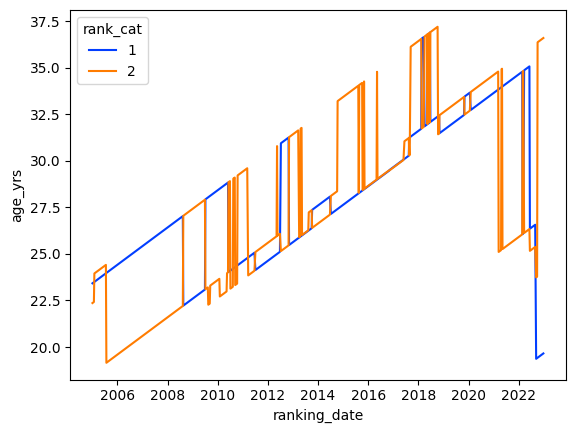

In [24]:
#Plot 1: 2005 to 2022, Age of Players ranked 1 and 2
fig = sns.lineplot(data=age_df[(age_df['year']>=2005) & (age_df['rank']<=2)], 
                   x='ranking_date', 
                   y='age_yrs', 
                   hue='rank_cat')

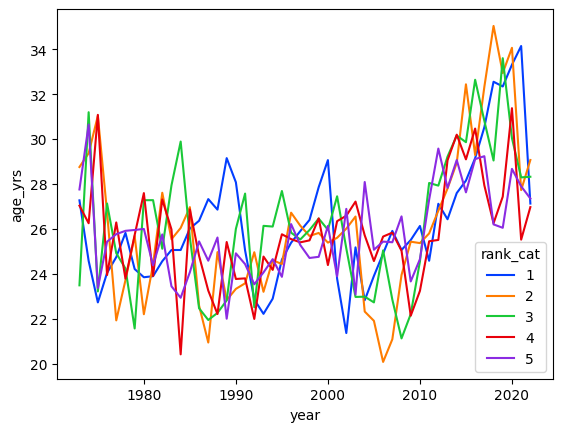

In [25]:
#Plot 2: average age of players ranked 1-5 from 1968 to 2022
fig = sns.lineplot(data=year_age_counts,
                   x='year', 
                   y='age_yrs', 
                   hue='rank_cat')

### What is the average height of players ranked 1-5?

In [26]:
ht_df = age_df 
ht_df['height_ft'] = ht_df['height']/30.48

year_ht_counts = pd.DataFrame(ht_df.groupby(['year','rank'])['height_ft'].mean()).reset_index()
year_ht_counts['rank_cat'] = year_ht_counts['rank'].astype('str')
year_ht_counts.head()

,year,rank,height_ft,rank_cat
0,1973,1,6.003937,1
1,1973,2,5.980502,2
2,1973,3,5.910199,3
3,1973,4,6.013311,4
4,1973,5,6.013311,5


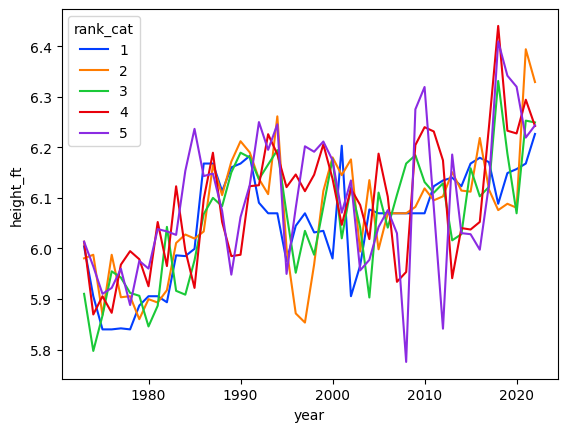

In [27]:
#Plot 3: Average height of players ranked 1-5 from 1968 to 2022
fig = sns.lineplot(data=year_ht_counts,
                   x='year', 
                   y='height_ft', 
                   hue='rank_cat')

### Explore the matches dataset

In [28]:
#1.) How to join on player data
#2.) Pick out one player
#3.) Look at their stats
#4.) Head to head frequency


In [29]:
#Convert walkover results to NAs
values_to_replace = ['W/O','Walkover','W/O']
matches['score'] = matches['score'].replace(values_to_replace, 0)

In [34]:
roger_data = matches[matches['player_id']==103819]

print('Roger Federer Wins: ',roger_data['outcome'].value_counts()[1])
print('Roger Federer Losses: ',roger_data['outcome'].value_counts()[0])

Roger Federer Wins:  1265
Roger Federer Losses:  280


In [37]:
roger_data["sets"]= roger_data["score"].str.split(" ", n = 5, expand = False)
roger_data['set1_score'] = roger_data['sets'].str[0]
roger_data['set2_score'] = roger_data['sets'].str[1]
roger_data['set3_score'] = roger_data['sets'].str[2]
roger_data['set4_score'] = roger_data['sets'].str[3]
roger_data['set5_score'] = roger_data['sets'].str[4]

roger_data['set1_games_won'] = roger_data['set1_score'].str.split("-", n = 2, expand = False).str[0].fillna(0)
roger_data['set2_games_won'] = roger_data['set2_score'].str.split("-", n = 2, expand = False).str[0].fillna(0)
roger_data['set3_games_won'] = roger_data['set3_score'].str.split("-", n = 2, expand = False).str[0].fillna(0)
roger_data['set4_games_won'] = roger_data['set4_score'].str.split("-", n = 2, expand = False).str[0].fillna(0)
roger_data['set5_games_won'] = roger_data['set5_score'].str.split("-", n = 2, expand = False).str[0].fillna(0)

roger_data['set1_games_lost'] = roger_data['set1_score'].str.split("-", n = 2, expand = False).str[1].fillna(0)
roger_data['set2_games_lost'] = roger_data['set2_score'].str.split("-", n = 2, expand = False).str[1].fillna(0)
roger_data['set3_games_lost'] = roger_data['set3_score'].str.split("-", n = 2, expand = False).str[1].fillna(0)
roger_data['set4_games_lost'] = roger_data['set4_score'].str.split("-", n = 2, expand = False).str[1].fillna(0)
roger_data['set5_games_lost'] = roger_data['set5_score'].str.split("-", n = 2, expand = False).str[1].fillna(0)

roger_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,player_id,player_seed,player_entry,...,set1_games_won,set2_games_won,set3_games_won,set4_games_won,set5_games_won,set1_games_lost,set2_games_lost,set3_games_lost,set4_games_lost,set5_games_lost
115478,1998-327,Toulouse,Hard,32,A,19980928,14,103819,NaN,Q,...,6,6,0,0,0,2,2,0,0,0
115487,1998-327,Toulouse,Hard,32,A,19980928,23,103819,NaN,Q,...,6,7,0,0,0,1,6(5),0,0,0
116234,1999-496,Marseille,Hard,32,A,19990201,1,103819,NaN,WC,...,7,3,6,0,0,6(1),6,3,0,0
116250,1999-496,Marseille,Hard,32,A,19990201,17,103819,NaN,WC,...,6,7,7,0,0,7(6),6(5),6(5),0,0
116462,1999-407,Rotterdam,Carpet,32,A,19990215,14,103819,NaN,Q,...,6,7,7,0,0,7(4),5,6(3),0,0


In [38]:
values_to_replace = ['RET','','W/O']

roger_data['set1_games_won'] = roger_data['set1_games_won'].replace(values_to_replace,0)
roger_data['set2_games_won'] = roger_data['set2_games_won'].replace(values_to_replace,0)
roger_data['set3_games_won'] = roger_data['set3_games_won'].replace(values_to_replace,0)
roger_data['set4_games_won'] = roger_data['set4_games_won'].replace(values_to_replace,0)
roger_data['set5_games_won'] = roger_data['set5_games_won'].replace(values_to_replace,0)


roger_data['set3_games_won'] = roger_data['set3_games_won'].replace('[11',11)
roger_data['set3_games_won'] = roger_data['set3_games_won'].replace('[10',10)



roger_data['set1_games_won'] = roger_data['set1_games_won'].astype(int)
roger_data['set2_games_won'] = roger_data['set2_games_won'].astype(int)
roger_data['set3_games_won'] = roger_data['set3_games_won'].astype(int)
roger_data['set4_games_won'] = roger_data['set4_games_won'].astype(int)
roger_data['set5_games_won'] = roger_data['set5_games_won'].astype(int)
roger_data['total_games_won'] = (roger_data['set1_games_won'] +
                                roger_data['set2_games_won'] +
                                roger_data['set3_games_won'] + 
                                roger_data['set4_games_won'] +
                                roger_data['set5_games_won'])

In [71]:
roger_data['set5_games_lost'].value_counts()

0        1491
3          16
2          11
4           6
1           6
7           3
5           3
6           3
6           2
8           1
14          1
11          1
12(3)       1
Name: set5_games_lost, dtype: int64

In [73]:
values_to_replace = ['6(0)','6(1)','6(2)','6(3)', '6(4)','6(5)','6(6)','6(7)','6(8)','6(9)','6(10)','6(11)','6(12)','6(13)','6(14)','6(18)','12(3)']
values_to_replace2 = ['7(0)','7(1)','7(2)','7(3)','7(4)','7(5)','7(6)','7(7)','7(8)','7(9)','7(10)','7(11)','7]','9]','12(3)']
values_to_replace3 = ['0']
values_to_replace4 = ['7']

roger_data['set1_games_lost'] = roger_data['set1_games_lost'].replace(values_to_replace,6).astype(int)
roger_data['set1_games_lost'] = roger_data['set1_games_lost'].replace(values_to_replace2,7).astype(int)
roger_data['set1_games_lost'] = roger_data['set1_games_lost'].replace(values_to_replace3,0).astype(int)
roger_data['set1_games_lost'] = roger_data['set1_games_lost'].replace(values_to_replace4,7).astype(int)

roger_data['set2_games_lost'] = roger_data['set2_games_lost'].replace(values_to_replace,6).astype(int)
roger_data['set2_games_lost'] = roger_data['set2_games_lost'].replace(values_to_replace2,7).astype(int)
roger_data['set2_games_lost'] = roger_data['set2_games_lost'].replace(values_to_replace3,0).astype(int)
roger_data['set2_games_lost'] = roger_data['set2_games_lost'].replace(values_to_replace4,7).astype(int)

roger_data['set3_games_lost'] = roger_data['set3_games_lost'].replace(values_to_replace,6).astype(int)
roger_data['set3_games_lost'] = roger_data['set3_games_lost'].replace(values_to_replace2,7).astype(int)
roger_data['set3_games_lost'] = roger_data['set3_games_lost'].replace(values_to_replace3,0).astype(int)
roger_data['set3_games_lost'] = roger_data['set3_games_lost'].replace(values_to_replace4,7).astype(int)

roger_data['set4_games_lost'] = roger_data['set4_games_lost'].replace(values_to_replace,6).astype(int)
roger_data['set4_games_lost'] = roger_data['set4_games_lost'].replace(values_to_replace2,7).astype(int)
roger_data['set4_games_lost'] = roger_data['set4_games_lost'].replace(values_to_replace3,0).astype(int)
roger_data['set4_games_lost'] = roger_data['set4_games_lost'].replace(values_to_replace4,7).astype(int)

roger_data['set5_games_lost'] = roger_data['set5_games_lost'].replace(values_to_replace,6).astype(int)
roger_data['set5_games_lost'] = roger_data['set5_games_lost'].replace(values_to_replace2,7).astype(int)
roger_data['set5_games_lost'] = roger_data['set5_games_lost'].replace(values_to_replace3,0).astype(int)
roger_data['set5_games_lost'] = roger_data['set5_games_lost'].replace(values_to_replace4,7).astype(int)

In [76]:
roger_data['total_games_lost'] = (roger_data['set1_games_lost'] +
                                roger_data['set2_games_lost'] +
                                roger_data['set3_games_lost'] + 
                                roger_data['set4_games_lost'] +
                                roger_data['set5_games_lost'])

roger_data['set1_win_perc'] = roger_data['set1_games_won'] / (roger_data['set1_games_won'] + roger_data['set1_games_lost'])
roger_data['set2_win_perc'] = roger_data['set2_games_won'] / (roger_data['set2_games_won'] + roger_data['set2_games_lost'])
roger_data['set3_win_perc'] = roger_data['set3_games_won'] / (roger_data['set3_games_won'] + roger_data['set3_games_lost'])
roger_data['set4_win_perc'] = roger_data['set4_games_won'] / (roger_data['set4_games_won'] + roger_data['set4_games_lost'])
roger_data['set5_win_perc'] = roger_data['set5_games_won'] / (roger_data['set5_games_won'] + roger_data['set5_games_lost'])

roger_data['game_win_perc'] = roger_data['total_games_won'] / (roger_data['total_games_won'] + roger_data['total_games_lost'])

In [77]:
roger_data.head(3)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,player_id,player_seed,player_entry,...,set4_games_lost,set5_games_lost,total_games_won,total_games_lost,set1_win_perc,set2_win_perc,set3_win_perc,set4_win_perc,set5_win_perc,game_win_perc
115478,1998-327,Toulouse,Hard,32,A,19980928,14,103819,NaN,Q,...,0,0,12,4,0.750000,0.750000,NaN,NaN,NaN,0.750000
115487,1998-327,Toulouse,Hard,32,A,19980928,23,103819,NaN,Q,...,0,0,13,7,0.857143,0.538462,NaN,NaN,NaN,0.650000
116234,1999-496,Marseille,Hard,32,A,19990201,1,103819,NaN,WC,...,0,0,16,15,0.538462,0.333333,0.666667,NaN,NaN,0.516129
